In [2]:
import pandas as pd
import numpy as np

# merging bertopic (kmeans), lsa, and original bertopic topics and similarity score results

In [3]:
bertopic_lotion = pd.read_csv('outputs/bertopic_lotion_kmeans.csv')
print(bertopic_lotion.columns)
bertopic_lotion.shape

Index(['review_text', 'topic', 'topic_number', 'star_rating', 'topic_words',
       'similarity_score'],
      dtype='object')


(20281, 6)

In [4]:
bertopic_lotion.rename(columns={'topic': 'bertopic_topic', 'topic_number': 'bertopic_topic_number', 'topic_words':'bertopic_topic_words', 'similarity_score':'bertopic_similarity_score'}, inplace=True)

In [5]:
# move column 'star_rating' to front
cols = bertopic_lotion.columns.tolist()
cols = [cols[3]] + cols[0:3] + cols[4:]
bertopic_lotion = bertopic_lotion[cols]

In [6]:
print(bertopic_lotion.columns)

Index(['star_rating', 'review_text', 'bertopic_topic', 'bertopic_topic_number',
       'bertopic_topic_words', 'bertopic_similarity_score'],
      dtype='object')


In [7]:
lsa_lotion = pd.read_csv('outputs/lsa_body_lotion.csv')
print(lsa_lotion.columns)

Index(['star_rating', 'review_text', 'lsa_topic_number', 'lsa_topic_words',
       'lsa_topic', 'similarity_score'],
      dtype='object')


In [8]:
lsa_lotion.rename(columns={'similarity_score': 'lsa_similarity_score'}, inplace=True)

In [9]:
# merge bertopic and lsa using review_text, remove duplicate columns
lotion = bertopic_lotion.merge(lsa_lotion, on=['star_rating', 'review_text'], how='inner')
print(lotion.shape)
lotion.head()

(20281, 10)


,star_rating,review_text,bertopic_topic,bertopic_topic_number,bertopic_topic_words,bertopic_similarity_score,lsa_topic_number,lsa_topic_words,lsa_topic,lsa_similarity_score
0,1.0,no retinol list on ingredient list,Poor lotion formula leads to skin reaction,0,use - skin - formula - lotion - new - product ...,0.348732,0,"bottle, new formula, scent, buy, year, old, ch...","""Old formula changed to unpleasant new scent w...",0.293639
1,1.0,same as everyone else… the change theyve make ...,Poor lotion formula leads to skin reaction,0,use - skin - formula - lotion - new - product ...,0.595260,0,"bottle, new formula, scent, buy, year, old, ch...","""Old formula changed to unpleasant new scent w...",0.593911
2,1.0,if youre look for something that smell good th...,"""Unpleasant smell, ineffective lotion formula.""",1,smell - scent - like - lotion - use - change -...,0.377245,1,"return, horrible smell, strong, dont, lotion s...","""Leather lotion with strong, horrible vanilla ...",0.335405
3,1.0,use this on my arm and leg have a strange text...,Poor lotion formula leads to skin reaction,0,use - skin - formula - lotion - new - product ...,0.482231,0,"bottle, new formula, scent, buy, year, old, ch...","""Old formula changed to unpleasant new scent w...",0.273992
4,1.0,i didnt get this because my shopper decide the...,"""Failed to open or receive faulty pumps and pr...",2,pump - product - order - open - bottle - recei...,0.021391,0,"bottle, new formula, scent, buy, year, old, ch...","""Old formula changed to unpleasant new scent w...",0.251975


In [10]:
og_bertopic = pd.read_csv('data/lotion+spray_bertopic_similarity_scores.csv')

In [11]:
og_bertopic_lotion = og_bertopic[og_bertopic['subcategory'] == 'BODY CARE BODY LOTION']

In [12]:
print(og_bertopic_lotion.shape)

(20281, 11)


In [13]:
og_bertopic_lotion_2 = og_bertopic_lotion[['star_rating', 'review_text', 'topic', 'similarity_score']].copy()
og_bertopic_lotion_2.rename(columns={'topic': 'og_bertopic_topic', 'similarity_score': 'og_bertopic_similarity_score'}, inplace=True)
og_bertopic_lotion_2.head()

,star_rating,review_text,og_bertopic_topic,og_bertopic_similarity_score
4731,5.0,i have use this lotion for year and love it ve...,Moisturizer preference and usage habits,0.571870
4732,3.0,ive be look for a new body lotion from a compa...,Positive reviews for a makeup remover (undeter...,0.284670
4733,5.0,this lotion be a must have if you have dry ski...,Positive reviews for a makeup remover (undeter...,0.293141
4734,1.0,no retinol list on ingredient list,Positive reviews for a makeup remover (undeter...,0.213130
4735,5.0,i love this lotion lovely scent it have bright...,Positive reviews for a makeup remover (undeter...,0.324178


In [14]:
# merge og_bertopic_lotion_2 with lotion using star_rating, review_text
lotion = lotion.merge(og_bertopic_lotion_2, on=['star_rating', 'review_text'], how='inner')
lotion.head()

,star_rating,review_text,bertopic_topic,bertopic_topic_number,bertopic_topic_words,bertopic_similarity_score,lsa_topic_number,lsa_topic_words,lsa_topic,lsa_similarity_score,og_bertopic_topic,og_bertopic_similarity_score
0,1.0,no retinol list on ingredient list,Poor lotion formula leads to skin reaction,0,use - skin - formula - lotion - new - product ...,0.348732,0,"bottle, new formula, scent, buy, year, old, ch...","""Old formula changed to unpleasant new scent w...",0.293639,Positive reviews for a makeup remover (undeter...,0.213130
1,1.0,same as everyone else… the change theyve make ...,Poor lotion formula leads to skin reaction,0,use - skin - formula - lotion - new - product ...,0.595260,0,"bottle, new formula, scent, buy, year, old, ch...","""Old formula changed to unpleasant new scent w...",0.593911,Positive reviews for a makeup remover (undeter...,0.214295
2,1.0,if youre look for something that smell good th...,"""Unpleasant smell, ineffective lotion formula.""",1,smell - scent - like - lotion - use - change -...,0.377245,1,"return, horrible smell, strong, dont, lotion s...","""Leather lotion with strong, horrible vanilla ...",0.335405,Fragrances and scents,0.444304
3,1.0,use this on my arm and leg have a strange text...,Poor lotion formula leads to skin reaction,0,use - skin - formula - lotion - new - product ...,0.482231,0,"bottle, new formula, scent, buy, year, old, ch...","""Old formula changed to unpleasant new scent w...",0.273992,Skin care for arms and legs,0.461196
4,1.0,i didnt get this because my shopper decide the...,"""Failed to open or receive faulty pumps and pr...",2,pump - product - order - open - bottle - recei...,0.021391,0,"bottle, new formula, scent, buy, year, old, ch...","""Old formula changed to unpleasant new scent w...",0.251975,Positive reviews for a makeup remover (undeter...,0.199522


# average similarity score for each review

In [15]:
# get avg of bertopic_similarity_score, lsa_similarity_score, og_bertopic_similarity_score
lotion['avg_similarity_score'] = lotion[['bertopic_similarity_score', 'lsa_similarity_score', 'og_bertopic_similarity_score']].mean(axis=1)


# best similarity score for each review

In [16]:
lotion['best_score'] = lotion[['bertopic_similarity_score', 'lsa_similarity_score', 'og_bertopic_similarity_score']].max(axis=1)

In [17]:
# create three cols: lsa_best, bertopic_best, og_bertopic_best and set = 0 if method_similarity_score highest for that row
lotion['lsa_best'] = 0
lotion['bertopic_best'] = 0
lotion['og_bertopic_best'] = 0

lotion.loc[lotion['lsa_similarity_score'] == lotion['best_score'], 'lsa_best'] = 1
lotion.loc[lotion['bertopic_similarity_score'] == lotion['best_score'], 'bertopic_best'] = 1
lotion.loc[lotion['og_bertopic_similarity_score'] == lotion['best_score'], 'og_bertopic_best'] = 1
lotion.head()

,star_rating,review_text,bertopic_topic,bertopic_topic_number,bertopic_topic_words,bertopic_similarity_score,lsa_topic_number,lsa_topic_words,lsa_topic,lsa_similarity_score,og_bertopic_topic,og_bertopic_similarity_score,avg_similarity_score,best_score,lsa_best,bertopic_best,og_bertopic_best
0,1.0,no retinol list on ingredient list,Poor lotion formula leads to skin reaction,0,use - skin - formula - lotion - new - product ...,0.348732,0,"bottle, new formula, scent, buy, year, old, ch...","""Old formula changed to unpleasant new scent w...",0.293639,Positive reviews for a makeup remover (undeter...,0.213130,0.285167,0.348732,0,1,0
1,1.0,same as everyone else… the change theyve make ...,Poor lotion formula leads to skin reaction,0,use - skin - formula - lotion - new - product ...,0.595260,0,"bottle, new formula, scent, buy, year, old, ch...","""Old formula changed to unpleasant new scent w...",0.593911,Positive reviews for a makeup remover (undeter...,0.214295,0.467822,0.595260,0,1,0
2,1.0,if youre look for something that smell good th...,"""Unpleasant smell, ineffective lotion formula.""",1,smell - scent - like - lotion - use - change -...,0.377245,1,"return, horrible smell, strong, dont, lotion s...","""Leather lotion with strong, horrible vanilla ...",0.335405,Fragrances and scents,0.444304,0.385651,0.444304,0,0,1
3,1.0,use this on my arm and leg have a strange text...,Poor lotion formula leads to skin reaction,0,use - skin - formula - lotion - new - product ...,0.482231,0,"bottle, new formula, scent, buy, year, old, ch...","""Old formula changed to unpleasant new scent w...",0.273992,Skin care for arms and legs,0.461196,0.405806,0.482231,0,1,0
4,1.0,i didnt get this because my shopper decide the...,"""Failed to open or receive faulty pumps and pr...",2,pump - product - order - open - bottle - recei...,0.021391,0,"bottle, new formula, scent, buy, year, old, ch...","""Old formula changed to unpleasant new scent w...",0.251975,Positive reviews for a makeup remover (undeter...,0.199522,0.157630,0.251975,1,0,0


# method most often the best

In [18]:
# count number of times each method has highest similarity score
lsa_best_count = lotion['lsa_best'].sum()
bertopic_best_count = lotion['bertopic_best'].sum()
og_bertopic_best_count = lotion['og_bertopic_best'].sum()

# print with labels
print(f'lsa_best_count: {lsa_best_count}')
print(f'bertopic_best_count: {bertopic_best_count}')
print(f'og_bertopic_best_count: {og_bertopic_best_count}')

lsa_best_count: 5134
bertopic_best_count: 8483
og_bertopic_best_count: 6664


### bertopic best most often

## by rating

In [19]:
# count number of times each method has highest similarity score for each star_rating
lsa_best_count = lotion.groupby('star_rating')['lsa_best'].sum()
bertopic_best_count = lotion.groupby('star_rating')['bertopic_best'].sum()
og_bertopic_best_count = lotion.groupby('star_rating')['og_bertopic_best'].sum()

# print with labels
print(f'lsa_best_count: {lsa_best_count}')
print(f'bertopic_best_count: {bertopic_best_count}')
print(f'og_bertopic_best_count: {og_bertopic_best_count}')

lsa_best_count: star_rating
1.0     524
2.0      76
3.0     308
4.0    1659
5.0    2567
Name: lsa_best, dtype: int64
bertopic_best_count: star_rating
1.0     583
2.0     409
3.0     510
4.0     300
5.0    6681
Name: bertopic_best, dtype: int64
og_bertopic_best_count: star_rating
1.0     418
2.0     181
3.0     241
4.0     638
5.0    5186
Name: og_bertopic_best, dtype: int64


In [20]:
colors = ['purple', '#1f77b4', 'pink']

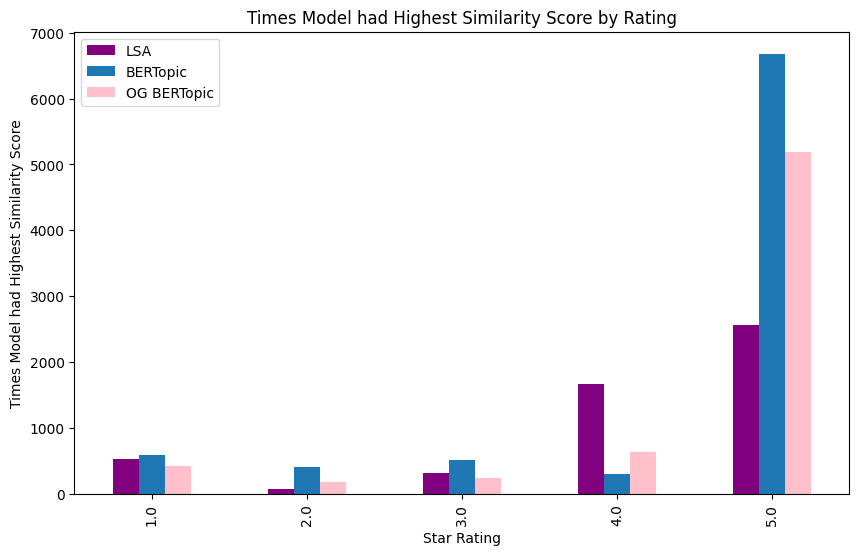

In [21]:
# plot barplot of number of times each method has highest similarity score for each star_rating
import matplotlib.pyplot as plt

# Create a DataFrame for plotting
performance_df = pd.DataFrame({
    'lsa_best_count': lsa_best_count,
    'bertopic_best_count': bertopic_best_count,
    'og_bertopic_best_count': og_bertopic_best_count
})

# Plot the bar plot
performance_df.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Times Model had Highest Similarity Score by Rating')
plt.xlabel('Star Rating')
plt.ylabel('Times Model had Highest Similarity Score')
plt.legend(['LSA', 'BERTopic', 'OG BERTopic'])
plt.show()

# average similarity score by rating

In [22]:
# get average similarity score for each star_rating for each method
lsa_avg_score = lotion.groupby('star_rating')['lsa_similarity_score'].mean()
bertopic_avg_score = lotion.groupby('star_rating')['bertopic_similarity_score'].mean()
og_bertopic_avg_score = lotion.groupby('star_rating')['og_bertopic_similarity_score'].mean()

# print with labels
print(f'lsa_avg_score: {lsa_avg_score}')
print(f'bertopic_avg_score: {bertopic_avg_score}')
print(f'og_bertopic_avg_score: {og_bertopic_avg_score}')

lsa_avg_score: star_rating
1.0    0.406494
2.0    0.366068
3.0    0.447816
4.0    0.525549
5.0    0.423283
Name: lsa_similarity_score, dtype: float64
bertopic_avg_score: star_rating
1.0    0.422769
2.0    0.474186
3.0    0.486157
4.0    0.484315
5.0    0.473145
Name: bertopic_similarity_score, dtype: float64
og_bertopic_avg_score: star_rating
1.0    0.349514
2.0    0.359328
3.0    0.360857
4.0    0.391016
5.0    0.402786
Name: og_bertopic_similarity_score, dtype: float64


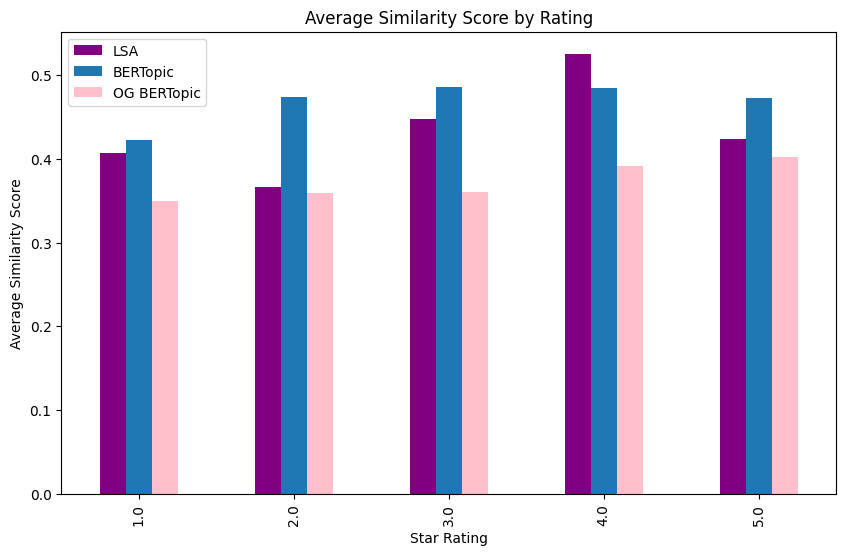

In [23]:
# plot barplot of average similarity score for each star_rating for each method
# Create a DataFrame for plotting
avg_ss_df = pd.DataFrame({
    'lsa_avg_score': lsa_avg_score,
    'bertopic_avg_score': bertopic_avg_score,
    'og_bertopic_avg_score': og_bertopic_avg_score
})

# Plot the bar plot
avg_ss_df.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Average Similarity Score by Rating')
plt.xlabel('Star Rating')
plt.ylabel('Average Similarity Score')
plt.legend(['LSA', 'BERTopic', 'OG BERTopic'])
plt.show()

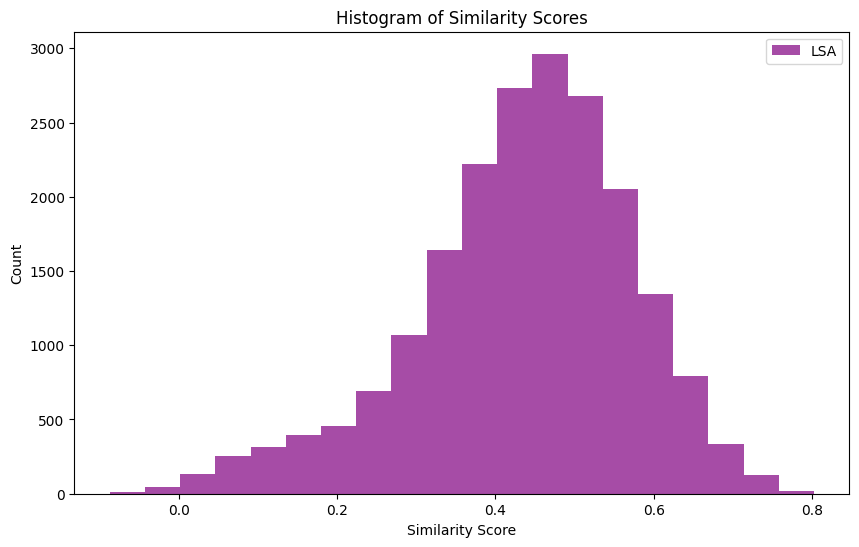

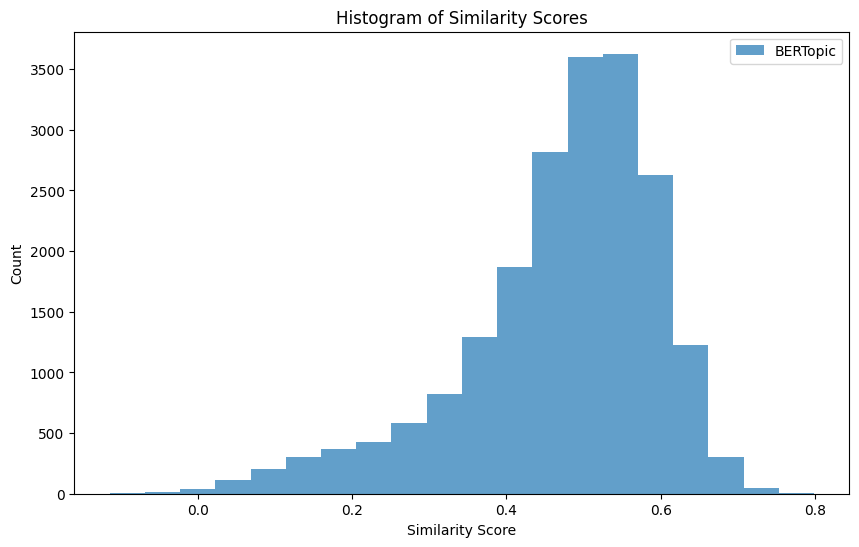

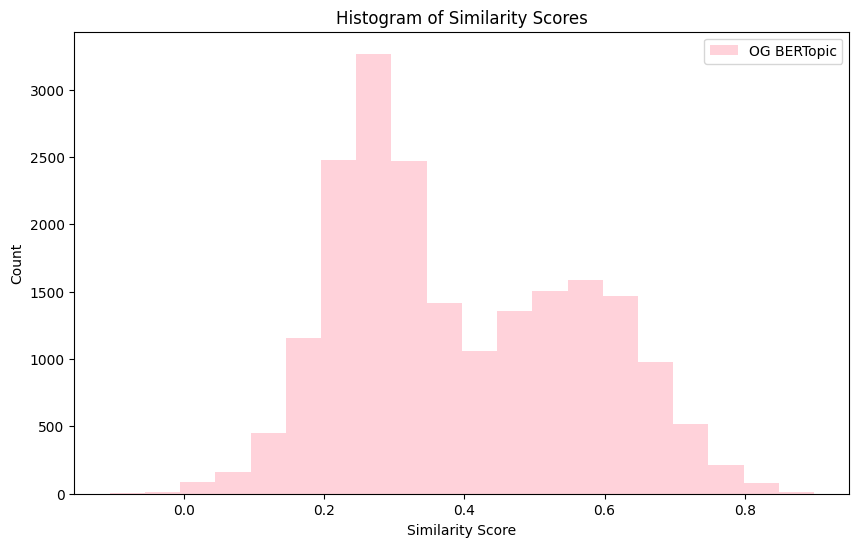

In [24]:
# overlay histograms of avg_similarity_score for each methodplt.clf()
def histogram(column, label, color):
    plt.figure(figsize=(10, 6))
    plt.hist(lotion[column], bins=20, alpha=0.7, label=label, color=color)
    # plt.hist(lotion['bertopic_similarity_score'], bins=20, alpha=0.5, label='BERTopic', color=colors[1])
    # plt.hist(lotion['og_bertopic_similarity_score'], bins=20, alpha=0.3, label='OG BERTopic', color=colors[2])
    plt.title('Histogram of Similarity Scores')
    plt.xlabel('Similarity Score')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

histogram('lsa_similarity_score', 'LSA', colors[0])
histogram('bertopic_similarity_score', 'BERTopic', colors[1])
histogram('og_bertopic_similarity_score', 'OG BERTopic', colors[2])

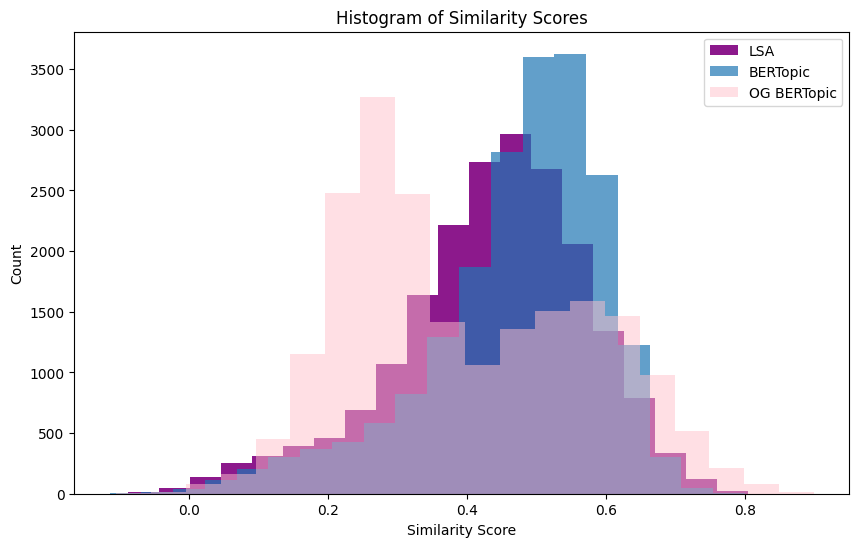

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(lotion['lsa_similarity_score'], bins=20, alpha=0.9, label='LSA', color='purple')
plt.hist(lotion['bertopic_similarity_score'], bins=20, alpha=0.7, label='BERTopic', color=colors[1])
plt.hist(lotion['og_bertopic_similarity_score'], bins=20, alpha=0.5, label='OG BERTopic', color='pink')
plt.title('Histogram of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Count')
plt.legend()
plt.show()

# save merged df to csv

In [26]:
lotion.head()

,star_rating,review_text,bertopic_topic,bertopic_topic_number,bertopic_topic_words,bertopic_similarity_score,lsa_topic_number,lsa_topic_words,lsa_topic,lsa_similarity_score,og_bertopic_topic,og_bertopic_similarity_score,avg_similarity_score,best_score,lsa_best,bertopic_best,og_bertopic_best
0,1.0,no retinol list on ingredient list,Poor lotion formula leads to skin reaction,0,use - skin - formula - lotion - new - product ...,0.348732,0,"bottle, new formula, scent, buy, year, old, ch...","""Old formula changed to unpleasant new scent w...",0.293639,Positive reviews for a makeup remover (undeter...,0.213130,0.285167,0.348732,0,1,0
1,1.0,same as everyone else… the change theyve make ...,Poor lotion formula leads to skin reaction,0,use - skin - formula - lotion - new - product ...,0.595260,0,"bottle, new formula, scent, buy, year, old, ch...","""Old formula changed to unpleasant new scent w...",0.593911,Positive reviews for a makeup remover (undeter...,0.214295,0.467822,0.595260,0,1,0
2,1.0,if youre look for something that smell good th...,"""Unpleasant smell, ineffective lotion formula.""",1,smell - scent - like - lotion - use - change -...,0.377245,1,"return, horrible smell, strong, dont, lotion s...","""Leather lotion with strong, horrible vanilla ...",0.335405,Fragrances and scents,0.444304,0.385651,0.444304,0,0,1
3,1.0,use this on my arm and leg have a strange text...,Poor lotion formula leads to skin reaction,0,use - skin - formula - lotion - new - product ...,0.482231,0,"bottle, new formula, scent, buy, year, old, ch...","""Old formula changed to unpleasant new scent w...",0.273992,Skin care for arms and legs,0.461196,0.405806,0.482231,0,1,0
4,1.0,i didnt get this because my shopper decide the...,"""Failed to open or receive faulty pumps and pr...",2,pump - product - order - open - bottle - recei...,0.021391,0,"bottle, new formula, scent, buy, year, old, ch...","""Old formula changed to unpleasant new scent w...",0.251975,Positive reviews for a makeup remover (undeter...,0.199522,0.157630,0.251975,1,0,0


In [ ]:
lotion.to_csv('outputs/lsa+bertopic_lotion.csv', index=False)

In [42]:
lsa_lotion[lsa_lotion['lsa_topic'].str.contains('scent exp')]

,star_rating,review_text,lsa_topic_number,lsa_topic_words,lsa_topic,lsa_similarity_score
1539,2.0,smell like an old lady and the odor stay with ...,1,"strong, good, lotion smell, sweet, smell like ...","""Doesn't live up to scent expectations, fails ...",0.361322
1546,2.0,the vanilla undertone be kind of nice but i ne...,1,"strong, good, lotion smell, sweet, smell like ...","""Doesn't live up to scent expectations, fails ...",0.473153
1567,2.0,the lotion smell good but overall water down,1,"strong, good, lotion smell, sweet, smell like ...","""Doesn't live up to scent expectations, fails ...",0.353448
1569,2.0,first i want to say that this moisturize beaut...,1,"strong, good, lotion smell, sweet, smell like ...","""Doesn't live up to scent expectations, fails ...",0.454939
1577,2.0,i didnt like that it leave a bad after smell l...,1,"strong, good, lotion smell, sweet, smell like ...","""Doesn't live up to scent expectations, fails ...",0.422655
...,...,...,...,...,...,...
2172,2.0,it literally smell like you rub yourself with ...,1,"strong, good, lotion smell, sweet, smell like ...","""Doesn't live up to scent expectations, fails ...",0.287686
2174,2.0,really disappoint in the smell if youve use al...,1,"strong, good, lotion smell, sweet, smell like ...","""Doesn't live up to scent expectations, fails ...",0.461074
2176,2.0,not a bad lotion but it smell like play dough ...,1,"strong, good, lotion smell, sweet, smell like ...","""Doesn't live up to scent expectations, fails ...",0.302112
2189,2.0,the smell be terrible i accidentally buy this ...,1,"strong, good, lotion smell, sweet, smell like ...","""Doesn't live up to scent expectations, fails ...",0.384846


In [56]:
# view rating, topic, count, avg_similarity_score for each topic for each method
def get_topic_info(df, method):
    topic_info = df.groupby(f'{method}_topic').agg(
        count=pd.NamedAgg(column='star_rating', aggfunc='count'),
        avg_similarity_score=pd.NamedAgg(column='lsa_similarity_score', aggfunc='mean')
    ).reset_index()
    # add star_rating column by getting star_rating values for each topic
    topic_info['star_rating'] = df.groupby(f'{method}_topic')['star_rating'].unique().values
    # convert star_rating to int
    topic_info['star_rating'] = topic_info['star_rating'].apply(lambda x: x[0])
    # sort by star_rating increasing, count decreasing
    topic_info = topic_info.sort_values(by=['star_rating', 'count'], ascending=[True, False]).reset_index(drop=True)
    return topic_info

lsa_topic_info = get_topic_info(lotion, 'lsa')
# print so that lsa_topic is not truncated
pd.set_option('display.max_colwidth', None)

bertopic_topic_info = get_topic_info(lotion, 'bertopic')

og_bertopic_topic_info = get_topic_info(lotion, 'og_bertopic')



In [55]:
lsa_topic_info

,lsa_topic,count,avg_similarity_score,star_rating
0,"""Old formula changed to unpleasant new scent with skin issues""",1062,0.444132,1.0
1,"""Product causes breakouts and dryness on sensitive skin""",273,0.305547,1.0
2,"""Leather lotion with strong, horrible vanilla scent and poor pump performance.""",190,0.341160,1.0
3,"""Dry skin not effectively moisturized by formula""",579,0.355366,2.0
4,"""Doesn't live up to scent expectations, fails to smell like vanilla""",64,0.396932,2.0
5,"""Moisturizer leaves skin sticky and dry""",23,0.549597,2.0
6,Dry skin lotion lacks scent and effective relief.,933,0.460921,3.0
7,"""Pump bottle may take time to work, some issues with breaking""",97,0.293041,3.0
8,Hydrating products help mixed skin,29,0.543900,3.0
9,"""Effective moisturizing lotion for dry skin, pleasant scent""",2389,0.532638,4.0


In [54]:
og_bertopic_topic_info

,og_bertopic_topic,count,avg_similarity_score,star_rating
0,Positive reviews for a makeup remover (undetermined topic),9627,0.445303,1.0
1,Moisturizing products and their effects on the skin,564,0.462754,1.0
2,Eczema and sensitive skin care,530,0.425060,1.0
3,Hydrating face cream reviews,498,0.479023,1.0
4,Cetaphil cleanser reviews and customer experiences,313,0.486166,1.0
...,...,...,...,...
672,User satisfaction and purchasing intent for Aveeno products,1,0.128859,5.0
673,Value for Price and Size of Product,1,-0.045783,5.0
674,Versatile adhesive hooks for household use,1,0.166259,5.0
675,Wife's satisfaction with a product,1,0.129765,5.0


In [57]:
bertopic_topic_info

,bertopic_topic,count,avg_similarity_score,star_rating
0,Poor lotion formula leads to skin reaction,795,0.460576,1.0
1,"""Unpleasant smell, ineffective lotion formula.""",416,0.471261,1.0
2,"""Failed to open or receive faulty pumps and products""",314,0.183759,1.0
3,Dry skin after using lotion,295,0.441598,2.0
4,"""Vanilla-scented lotion with a strong smell""",241,0.345752,2.0
5,"""Pump and product issues with lotion despite good order""",130,0.232336,2.0
6,Moisturized skin with decent product,488,0.488039,3.0
7,Good fragrance feels on skin,365,0.500634,3.0
8,"""Functional lotion pump in a bottle, usable product.""",206,0.258946,3.0
9,"""Moisturizing skin feel great, lotion use good""",1602,0.560382,4.0


# og bertopic without undetermined topics

In [60]:
# average similarity score for og_bertopic without topic containing 'undetermined'
lotion[~lotion['og_bertopic_topic'].str.contains('undetermined')]['og_bertopic_similarity_score'].mean()

np.float64(0.5129389041659096)

In [61]:
# average similarity score by rating for og_bertopic without topic containing 'undetermined'
lotion[~lotion['og_bertopic_topic'].str.contains('undetermined')].groupby('star_rating')['og_bertopic_similarity_score'].mean()

star_rating
1.0    0.462449
2.0    0.474873
3.0    0.478761
4.0    0.505757
5.0    0.523003
Name: og_bertopic_similarity_score, dtype: float64

In [62]:
# average similarity score for og_bertopic with topic containing 'undetermined'
lotion['og_bertopic_similarity_score'].mean()

np.float64(0.3936569320862142)